
### REG:URK22AI1030
### Simple Linear Regression

#### Steps:
1. Read the CSV data into a pandas DataFrame
2. Preprocess the data as necessary
3. Choose the independent variable (X) and the dependent variable (Y)
4. Find the coefficients \(b_0\) and \(b_1\) to get the predicted \(Y\) (Y_pred)
5. Calculate the Sum of Squared Errors (SSE)
6. Calculate the Root Mean Square Error (RMSE)
7. Calculate the coefficient of determination (\(r^2\))
8. Plot the regression line along with the given data points
9. Predict the output for a given input value


In [1]:
!pip install pandas numpy matplotlib scikit-learn

Defaulting to user installation because normal site-packages is not writeable


   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  
Intercept (b0): 174.392962351625
Coefficient (b1): 1.330265789901878
SSE: 139003.85615393321
RMSE: 47.7362727936358
r2: 0.0010067149019027388


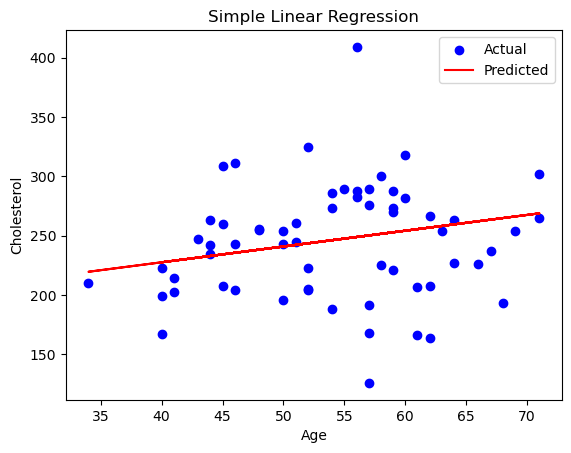

Predicted Cholesterol for Age 55: 247.55758079622828


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [2]:
# Simple Linear Regression

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

data = pd.read_csv('heart.csv')

print(data.head())


X = data[['age']]
Y = data['chol']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)

b0 = model.intercept_
b1 = model.coef_[0]

print(f"Intercept (b0): {b0}")
print(f"Coefficient (b1): {b1}")

SSE = np.sum((Y_test - Y_pred) ** 2)
print(f"SSE: {SSE}")

RMSE = np.sqrt(mean_squared_error(Y_test, Y_pred))
print(f"RMSE: {RMSE}")

r2 = r2_score(Y_test, Y_pred)
print(f"r2: {r2}")

plt.scatter(X_test, Y_test, color='blue', label='Actual')
plt.plot(X_test, Y_pred, color='red', label='Predicted')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.title('Simple Linear Regression')
plt.legend()
plt.show()

input_value = [[55]]  # example input value for age
predicted_value = model.predict(input_value)
print(f"Predicted Cholesterol for Age 55: {predicted_value[0]}")


### Multiple Linear Regression

#### Steps:
1. Read the CSV data into a pandas DataFrame
2. Preprocess the data as necessary
3. Choose the independent variables (X1, X2, ...) and the dependent variable (Y)
4. Print the values of the y-intercept and independent variable coefficients
5. Find the predicted \(Y\) (Y_pred)
6. Calculate the Sum of Squared Errors (SSE) and RMSE
7. Calculate the coefficient of determination (\(r^2\))
8. Predict the output for given input values


In [3]:
# Multiple Linear Regression

from sklearn.preprocessing import StandardScaler

data = pd.read_csv('heart.csv')

print(data.head())


X = data[['age', 'trestbps', 'thalach']]
Y = data['chol']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)

b0 = model.intercept_
b_coefficients = model.coef_

print(f"Intercept (b0): {b0}")
print(f"Coefficients: {b_coefficients}")

SSE = np.sum((Y_test - Y_pred) ** 2)
print(f"SSE: {SSE}")

RMSE = np.sqrt(mean_squared_error(Y_test, Y_pred))
print(f"RMSE: {RMSE}")

r2 = r2_score(Y_test, Y_pred)
print(f"r2: {r2}")

input_values = [[55, 130, 150]]
input_values_scaled = scaler.transform(input_values)
predicted_value = model.predict(input_values_scaled)
print(f"Predicted Cholesterol for input values [55, 130, 150]: {predicted_value[0]}")


   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  
Intercept (b0): 246.88509312514057
Coefficients: [13.30830984  4.34471433  6.34043012]
SSE: 144619.4259665803
RMSE: 48.69096694200289
r2: -0.039351277243449
Predicted Cholesterol for input values [55, 130, 150]: 247.5101522442578


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  
Intercept (b0): 246.88509312514057
Coefficients: [13.30830984  4.34471433  6.34043012]
SSE: 144619.42596658028
RMSE: 48.69096694200289
r2: -0.03935127724344878


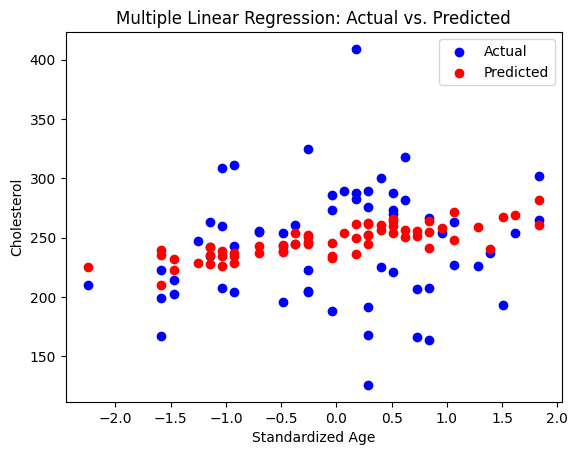

Predicted Cholesterol for input values [55, 130, 150]: 247.5101522442578


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [7]:
# Multiple Linear Regression

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

data = pd.read_csv('heart.csv')

print(data.head())

X = data[['age', 'trestbps', 'thalach']]
Y = data['chol']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)

b0 = model.intercept_
b_coefficients = model.coef_

print(f"Intercept (b0): {b0}")
print(f"Coefficients: {b_coefficients}")

SSE = np.sum((Y_test - Y_pred) ** 2)
print(f"SSE: {SSE}")

RMSE = np.sqrt(mean_squared_error(Y_test, Y_pred))
print(f"RMSE: {RMSE}")

r2 = r2_score(Y_test, Y_pred)
print(f"r2: {r2}")

plt.scatter(X_test[:, 0], Y_test, color='blue', label='Actual')
plt.scatter(X_test[:, 0], Y_pred, color='red', label='Predicted')
plt.xlabel('Standardized Age')
plt.ylabel('Cholesterol')
plt.title('Multiple Linear Regression: Actual vs. Predicted')
plt.legend()
plt.show()

input_values = [[55, 130, 150]]  # example input
input_values_scaled = scaler.transform(input_values)
predicted_value = model.predict(input_values_scaled)
print(f"Predicted Cholesterol for input values [55, 130, 150]: {predicted_value[0]}")


### Logistic Regression

#### Steps:
1. Read the CSV data into a pandas DataFrame
2. Preprocess the data (data imputation for null values, encoding techniques to convert categorical to numerical)
3. Choose the independent variables (X1, X2, ...) and the dependent variable (Y)
4. Find the regression line and convert it into a sigmoid curve
5. Calculate the cost or error and reduce it using gradient descent
6. Plot the graph for iteration against cost
7. Find the accuracy of the model


In [5]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

data = pd.read_csv('heart.csv')

print(data.head())


data.fillna(method='ffill', inplace=True)

X = data[['age', 'trestbps', 'chol', 'thalach']]
Y = data['target']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)

model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)

accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy: {accuracy}")

conf_matrix = confusion_matrix(Y_test, Y_pred)
print(f"Confusion Matrix:\n{conf_matrix}")

input_values = [[55, 130, 200, 150]]
input_values_scaled = scaler.transform(input_values)
predicted_value = model.predict(input_values_scaled)
print(f"Predicted target for input values [55, 130, 200, 150]: {predicted_value[0]}")


   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  
Accuracy: 0.7704918032786885
Confusion Matrix:
[[22  7]
 [ 7 25]]
Predicted target for input values [55, 130, 200, 150]: 1


<ipython-input-5-8574962e86db>:15: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  
Accuracy: 0.7704918032786885
Confusion Matrix:
[[22  7]
 [ 7 25]]


<ipython-input-8-2044e2d5c23d>:20: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


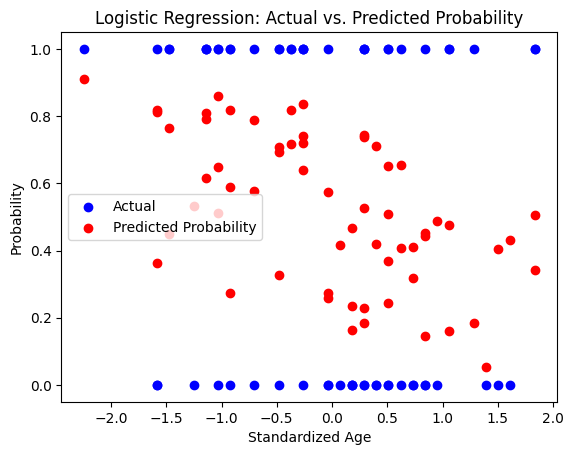

Predicted target for input values [55, 130, 200, 150]: 1
Predicted probability for input values [55, 130, 200, 150]: 0.5724695508159924


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [8]:
# Logistic Regression

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

data = pd.read_csv('heart.csv')

print(data.head())


data.fillna(method='ffill', inplace=True)

X = data[['age', 'trestbps', 'chol', 'thalach']]
Y = data['target']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)

model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)
Y_prob = model.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy: {accuracy}")

conf_matrix = confusion_matrix(Y_test, Y_pred)
print(f"Confusion Matrix:\n{conf_matrix}")

plt.scatter(X_test[:, 0], Y_test, color='blue', label='Actual')
plt.scatter(X_test[:, 0], Y_prob, color='red', label='Predicted Probability')
plt.xlabel('Standardized Age')
plt.ylabel('Probability')
plt.title('Logistic Regression: Actual vs. Predicted Probability')
plt.legend()
plt.show()

input_values = [[55, 130, 200, 150]]  # example input values for age, trestbps, chol, and thalach
input_values_scaled = scaler.transform(input_values)
predicted_value = model.predict(input_values_scaled)
predicted_prob = model.predict_proba(input_values_scaled)[:, 1]
print(f"Predicted target for input values [55, 130, 200, 150]: {predicted_value[0]}")
print(f"Predicted probability for input values [55, 130, 200, 150]: {predicted_prob[0]}")
